# Пример создания датасета на основе скрейпинга

In [1]:
import os
import datetime
import dateparser
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
# Вспомогательная функция форматирования даты
def format_date(str_date):
    '''
    Пример строки: '2024г.27 октября,воскресенье'
    На выходе хотим получить: '27 октября 2024г.' 
    '''
    temp1 = str_date.split(',')[0] # '2024г.27 октября'
    try:
        temp2 = temp1.split('.') # ['2024г', '27 октября']
        # Форматирование с помощью функции format
        # result = '{} {}.'.format(temp2[1], temp2[0])
        # Форматирование с помощью f-строки
        result = f'{temp2[1]} {temp2[0]}.' 
    except:
        # Ячейка, в которой не указан год
        # Год добавляется вручную
        today = datetime.date.today()
        year = today.year
        result = f'{temp1} {year}г.' 
    
    result = result.replace('\xa0', ' ')
    return result

In [3]:
format_date('2024г.27 октября,воскресенье')

'27 октября 2024г.'

In [4]:
format_date('26 октября,суббота')

'26 октября 2024г.'

In [5]:
# Вспомогательная функция форматирования даты и времени
def format_date_hour(str_date, hour):
    d = dateparser.parse(str_date)
    result = '{} {}:00:00'.format(d.strftime('%Y-%m-%d'), hour)
    return result

In [6]:
format_date_hour('27 октября 2024г.', '21')

'2024-10-27 21:00:00'

## Получение страницы

In [7]:
# Обращение к странице
url = 'https://rp5.ru/Архив_погоды_в_Москве_(центр,_Балчуг)'
# Запрос с помощью библиотеки Requests
html_text = requests.get(url).text
html_text

'\r\n<!DOCTYPE html>\r\n<html lang="ru" xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<title>Архив погоды в Москве (центр, Балчуг)</title>\r\n<script type="application/ld+json">\r\n{\r\n"dateModified": "2024-10-28"\r\n}\r\n</script>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<meta name="description" content="Архив погоды в Москве (центр, Балчуг). Реальная погода в Москве (центр, Балчуг).Фактическая погода в Москве (центр, Балчуг).Текущая погода в Москве (центр, Балчуг)." />\r\n<meta name="keywords" content="архив погоды в москве (центр, балчуг), реальная погода в москве (центр, балчуг).фактическая погода в москве (центр, балчуг).текущая погода в москве (центр, балчуг)" />\r\n<meta name="viewport" content="height=device-height, user-scalable=yes">\r\n<meta name="referrer" content="origin">\r\n<meta name="msapplication-config" content="/browserconfig.xml">\r\n<meta name="msapplication-TileColor" content="#005eb5" />\r\n<link rel="apple-touch-icon" ty

In [8]:
# Можно сохранить полученную страницу в текстовый файл, чтобы обрабатывать ее оффлайн
#with open('temp.txt', 'wt') as f:
#    f.write(html_text)

# Файл будет сохранен в текущий каталог
#os.getcwd()

In [9]:
# Можно прочитать полученную страницу из текстового файла, чтобы обрабатывать ее оффлайн
with open('temp.txt', 'rt') as f:
    html_text2 = f.read()
html_text2

'\n\n<!DOCTYPE html>\n\n<html lang="ru" xmlns="http://www.w3.org/1999/xhtml">\n\n<head>\n\n<title>Архив погоды в Москве (центр, Балчуг)</title>\n\n<script type="application/ld+json">\n\n{\n\n"dateModified": "2024-10-27"\n\n}\n\n</script>\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="description" content="Архив погоды в Москве (центр, Балчуг). Реальная погода в Москве (центр, Балчуг).Фактическая погода в Москве (центр, Балчуг).Текущая погода в Москве (центр, Балчуг)." />\n\n<meta name="keywords" content="архив погоды в москве (центр, балчуг), реальная погода в москве (центр, балчуг).фактическая погода в москве (центр, балчуг).текущая погода в москве (центр, балчуг)" />\n\n<meta name="viewport" content="height=device-height, user-scalable=yes">\n\n<meta name="referrer" content="origin">\n\n<meta name="msapplication-config" content="/browserconfig.xml">\n\n<meta name="msapplication-TileColor" content="#005eb5" />\n\n<link rel="apple-touch-icon" ty

## Разбор страницы и создание датасета

In [10]:
# Разбор документа
soup = BeautifulSoup(html_text2, 'lxml')
soup

<!DOCTYPE html>
<html lang="ru" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Архив погоды в Москве (центр, Балчуг)</title>
<script type="application/ld+json">

{

"dateModified": "2024-10-27"

}

</script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Архив погоды в Москве (центр, Балчуг). Реальная погода в Москве (центр, Балчуг).Фактическая погода в Москве (центр, Балчуг).Текущая погода в Москве (центр, Балчуг)." name="description"/>
<meta content="архив погоды в москве (центр, балчуг), реальная погода в москве (центр, балчуг).фактическая погода в москве (центр, балчуг).текущая погода в москве (центр, балчуг)" name="keywords"/>
<meta content="height=device-height, user-scalable=yes" name="viewport"/>
<meta content="origin" name="referrer"/>
<meta content="/browserconfig.xml" name="msapplication-config"/>
<meta content="#005eb5" name="msapplication-TileColor"/>
<link href="images/favicons/ios/ic_ios_57x57.png" rel="apple-touch-icon" sizes="5

In [11]:
# Поиск таблицы
table = soup.find(id = 'archiveTable')
table

<table cellpadding="0" cellspacing="0" id="archiveTable" width="100%"> <tr> <td class="cl_hd_fr" colspan="2" onmouseout="hideInfo(this, 'hint')" onmouseover="tooltip(this, 'Время в данном населённом пункте. Учитывается летнее/зимнее время' , 'hint')"> <div class="brdDateLightArc forDate"><span class="dfs">Дата</span> / Местное время</div> </td><td class="cl_hd" id="t_archive_t" onmouseout="hideInfo(this, 'hint')" onmouseover="tooltip(this, 'Температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли' , 'hint')"><div class="brdDateLightArc">T</div></td><td class="cl_hd" id="t_archive_po" onmouseout="hideInfo(this, 'hint')" onmouseover="tooltip(this, 'Атмосферное давление на уровне станции (миллиметры ртутного столба)' , 'hint')"><div class="brdDateLightArc">Po</div></td><td class="cl_hd" id="t_archive_p" onmouseout="hideInfo(this, 'hint')" onmouseover="tooltip(this, 'Атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)' , 'hint')"><div

In [12]:
# Получение значения из числовой ячейки таблицы для данного примера
def get_value(tds, index):
    '''
    tds - список ячеек таблицы
    index - индекс ячейки
    '''
    # Значение первого элемента div, вложенного в ячейку
    result = tds[index].find_all('div')[0].text
    return result

In [13]:
# Получение значения из текстовой ячейки таблицы для данного примера
def get_text_value(tds, index):
    '''
    tds - список ячеек таблицы
    index - индекс ячейки
    '''
    delim = '|'
    # Значение первого элемента div, вложенного в ячейку
    temp1 = tds[index].get_text(delim)
    temp2 = temp1.split(delim)
    return temp2[0]

In [14]:
# Разбор таблицы в список
def parce_table_to_list(table):
    lst = []
    # Счетчик строк
    row_num = 0

    # Название css-класса для ячейки с датой
    date_css_class = 'cl_dt'

    # Значение даты
    current_date_value = ''

    # Номера колонок
    time_index = 1
    T_index = 2
    P_index = 4
    FF_index = 8
       
    for tr in table.find_all('tr'):
        # Все ячейки строки
        tds = tr.find_all('td')

        if row_num == 0:
            # Строка заголовка не обрабатывается 
            pass
        else:
            # Получение атрибута 'class'
            td_class = tds[0].attrs['class'][0]
            # Проверка что строка начинается с даты
            if td_class==date_css_class:
                # Обработка строки с датой
                current_date_value = format_date(tds[0].text)
                # Получение данных из других ячеек
                temp_time = get_value(tds, time_index)
                temp_T = get_value(tds, T_index)
                temp_P = get_value(tds, P_index)
                temp_FF = get_text_value(tds, FF_index)
            else:
                # Обработка строки без даты
                # индекс-1 так как отсутствует ячейка с датой
                temp_time = get_value(tds, time_index-1)
                temp_T = get_value(tds, T_index-1)
                temp_P = get_value(tds, P_index-1)
                temp_FF = get_text_value(tds, FF_index-1)

            dt = format_date_hour(current_date_value, temp_time)
            temp_data = (current_date_value, temp_time, dt, temp_T, temp_P, temp_FF)
            lst.append(temp_data)
        # Увеличиваем счетчик строк
        row_num += 1
    # Возвращается итоговый список
    return lst

In [15]:
lst = parce_table_to_list(table)
lst

[('27 октября 2024г.', '21', '2024-10-27 21:00:00', '9.1', '766.6', 'Штиль'),
 ('27 октября 2024г.', '18', '2024-10-27 18:00:00', '9.6', '766.9', 'Штиль'),
 ('27 октября 2024г.',
  '15',
  '2024-10-27 15:00:00',
  '10.1',
  '767.5',
  'Тихий ветер'),
 ('27 октября 2024г.', '12', '2024-10-27 12:00:00', '9.7', '768.3', 'Штиль'),
 ('27 октября 2024г.', '09', '2024-10-27 09:00:00', '7.2', '768.4', 'Штиль'),
 ('27 октября 2024г.', '06', '2024-10-27 06:00:00', '7.5', '768.3', 'Штиль'),
 ('27 октября 2024г.',
  '03',
  '2024-10-27 03:00:00',
  '7.9',
  '768.1',
  'Тихий ветер'),
 ('27 октября 2024г.',
  '00',
  '2024-10-27 00:00:00',
  '8.4',
  '768.6',
  'Тихий ветер'),
 ('26 октября 2024г.',
  '21',
  '2024-10-26 21:00:00',
  '8.2',
  '768.7',
  'Тихий ветер')]

## Сохранение разобранной страницы в файл

In [16]:
# Сохранение списка в csv
def save_list_to_csv(lst, filename):
    with open(filename, 'wt', encoding='utf-8') as f:
        # Запись строки заголовка
        f.write('date;time;dt;T;P;Ff')
        for tpl in lst:
            t = list(tpl)
            f.write('\n')
            f.write('"{}";{};"{}";{};{};"{}"'.format(t[0], int(t[1]), t[2], float(t[3]), float(t[4]), t[5]))


In [17]:
save_list_to_csv(lst, 'weather.csv')

## Проверка сформированного датасета

In [18]:
# Чтение датасета
data = pd.read_csv('weather.csv', sep=';')
data

,date,time,dt,T,P,Ff
0,27 октября 2024г.,21,2024-10-27 21:00:00,9.1,766.6,Штиль
1,27 октября 2024г.,18,2024-10-27 18:00:00,9.6,766.9,Штиль
2,27 октября 2024г.,15,2024-10-27 15:00:00,10.1,767.5,Тихий ветер
3,27 октября 2024г.,12,2024-10-27 12:00:00,9.7,768.3,Штиль
4,27 октября 2024г.,9,2024-10-27 09:00:00,7.2,768.4,Штиль
5,27 октября 2024г.,6,2024-10-27 06:00:00,7.5,768.3,Штиль
6,27 октября 2024г.,3,2024-10-27 03:00:00,7.9,768.1,Тихий ветер
7,27 октября 2024г.,0,2024-10-27 00:00:00,8.4,768.6,Тихий ветер
8,26 октября 2024г.,21,2024-10-26 21:00:00,8.2,768.7,Тихий ветер


In [19]:
# Конвертирование колонки в дата-время
data['dt'] = pd.to_datetime(data['dt'])
data

,date,time,dt,T,P,Ff
0,27 октября 2024г.,21,2024-10-27 21:00:00,9.1,766.6,Штиль
1,27 октября 2024г.,18,2024-10-27 18:00:00,9.6,766.9,Штиль
2,27 октября 2024г.,15,2024-10-27 15:00:00,10.1,767.5,Тихий ветер
3,27 октября 2024г.,12,2024-10-27 12:00:00,9.7,768.3,Штиль
4,27 октября 2024г.,9,2024-10-27 09:00:00,7.2,768.4,Штиль
5,27 октября 2024г.,6,2024-10-27 06:00:00,7.5,768.3,Штиль
6,27 октября 2024г.,3,2024-10-27 03:00:00,7.9,768.1,Тихий ветер
7,27 октября 2024г.,0,2024-10-27 00:00:00,8.4,768.6,Тихий ветер
8,26 октября 2024г.,21,2024-10-26 21:00:00,8.2,768.7,Тихий ветер


In [20]:
data.dtypes

date            object
time             int64
dt      datetime64[ns]
T              float64
P              float64
Ff              object
dtype: object

<Axes: xlabel='dt'>

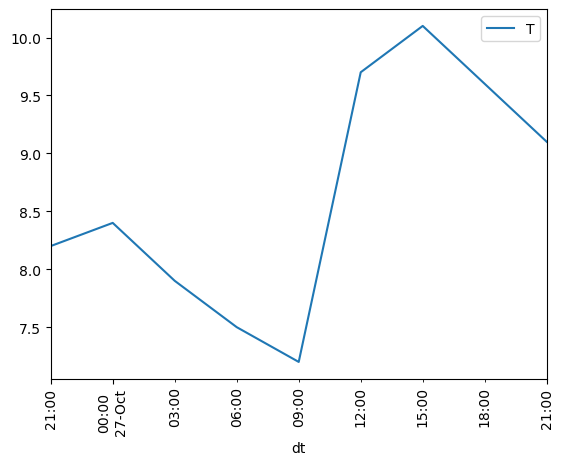

In [21]:
data.plot(x='dt', y='T', rot=90)

<Axes: xlabel='dt'>

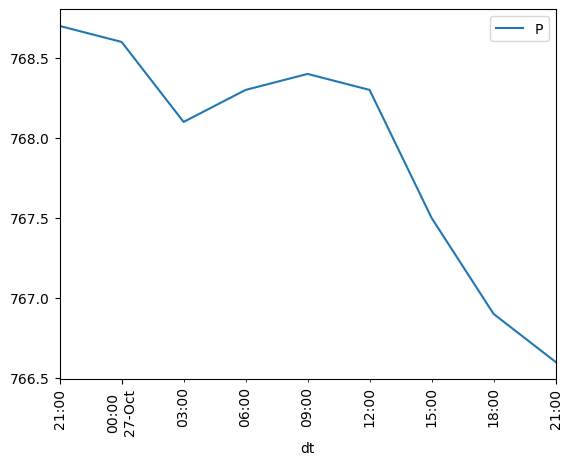

In [22]:
data.plot(x='dt', y='P', rot=90)

<Axes: ylabel='Frequency'>

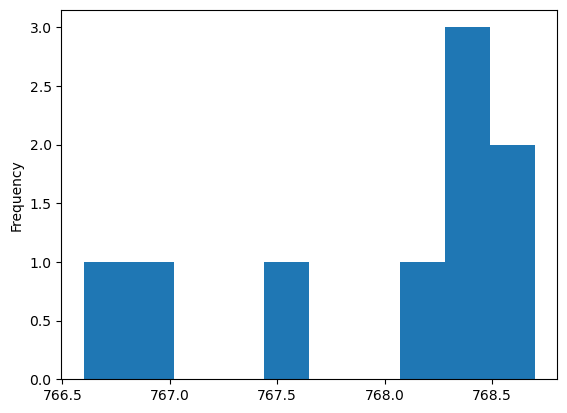

In [23]:
data['P'].plot(kind='hist')

<Axes: ylabel='P'>

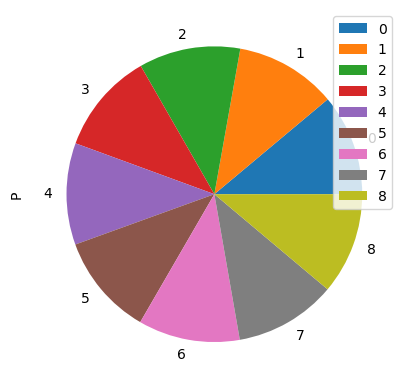

In [24]:
data.plot(y='P', kind='pie')